# Imports and Augmentation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
plt.style.use("ggplot")

import requests
import tensorflow as tf

## DATA AUGMENTATION

In [5]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [7]:
classes=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [ ]:
classes

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
48077,1.000000,0.949495,0.792929,0.371212,0.133838,0.166667,0.148990,0.075758,0.070707,0.065657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74162,0.885167,0.679426,0.064593,0.000000,0.179426,0.205742,0.224880,0.224880,0.236842,0.229665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79602,1.000000,0.960000,0.665714,0.311429,0.151429,0.137143,0.094286,0.100000,0.062857,0.065714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80844,1.000000,0.887916,0.514886,0.264448,0.199650,0.180385,0.169877,0.145359,0.148862,0.150613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
82806,0.938017,0.869835,0.789256,0.709711,0.601240,0.511364,0.398760,0.321281,0.264463,0.241736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# CNN Model

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Conv1D, MaxPool1D, Flatten, Dropout, BatchNormalization
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    
model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 186, 32)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 186, 64)           6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 186, 128)          41088     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 93, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 93, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11904)             0         
                                                        

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='loss', save_best_only=True)]

In [13]:
history=model.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=callbacks, batch_size=32, epochs = 10)

Epoch 1/10
3125/3125 [==============================] - 30s 6ms/step - loss: 0.2098 - accuracy: 0.9234 - val_loss: 0.2117 - val_accuracy: 0.9193
Epoch 2/10
3125/3125 [==============================] - 16s 5ms/step - loss: 0.0749 - accuracy: 0.9739 - val_loss: 0.1518 - val_accuracy: 0.9535
Epoch 3/10
3125/3125 [==============================] - 17s 5ms/step - loss: 0.0505 - accuracy: 0.9835 - val_loss: 0.1074 - val_accuracy: 0.9736
Epoch 4/10
3125/3125 [==============================] - 18s 6ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.1636 - val_accuracy: 0.9551
Epoch 5/10
3125/3125 [==============================] - 17s 6ms/step - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.1178 - val_accuracy: 0.9774
Epoch 6/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.1414 - val_accuracy: 0.9742
Epoch 7/10
3125/3125 [==============================] - 17s 6ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.1358 - val_ac

## Evaluation

In [14]:
y_pred = model.predict(X_test)

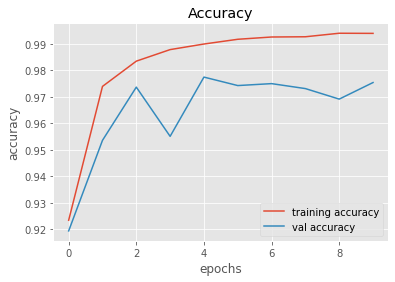

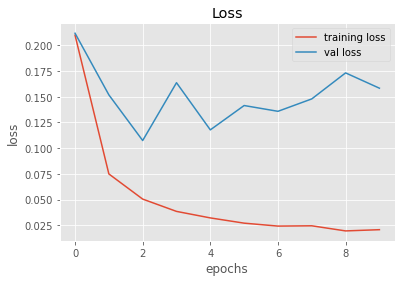

In [15]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [16]:
loss,accuracy=model.evaluate(X_test,y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

685/685 [==============================] - 2s 3ms/step - loss: 0.1583 - accuracy: 0.9754
Test loss: 0.15827590227127075
Test accuracy: 0.9753791093826294


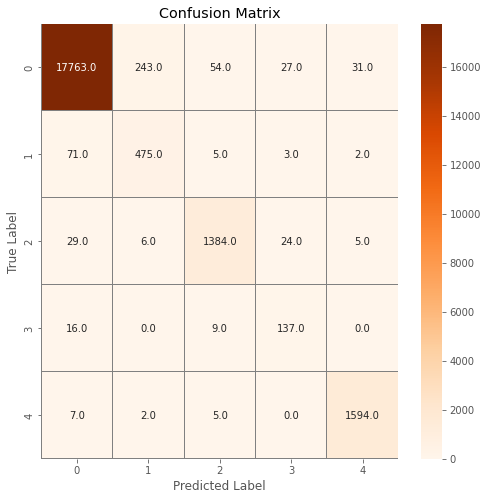

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [18]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.65      0.85      0.74       556
           2       0.95      0.96      0.95      1448
           3       0.72      0.85      0.78       162
           4       0.98      0.99      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.86      0.93      0.89     21892
weighted avg       0.98      0.98      0.98     21892



# LSTM Model

In [19]:
from keras.layers.normalization.batch_normalization import BatchNormalization
model_LSTM = Sequential()

model_LSTM.add(Bidirectional(LSTM(units= 187, input_shape= (X_train.shape[1],1))))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(5, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_LSTM.build(input_shape= (X_train.shape[0],X_train.shape[1],1))

In [ ]:
model_LSTM.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (100000, 374)            282744    
 nal)                                                            
                                                                 
 dropout_17 (Dropout)        (100000, 374)             0         
                                                                 
 dense_42 (Dense)            (100000, 5)               1875      
                                                                 
Total params: 284,619
Trainable params: 284,619
Non-trainable params: 0
_________________________________________________________________


In [20]:
history=model_LSTM.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=256, epochs = 10)

Epoch 1/10
391/391 [==============================] - 28s 60ms/step - loss: 0.8646 - accuracy: 0.6683 - val_loss: 0.5875 - val_accuracy: 0.8319
Epoch 2/10
391/391 [==============================] - 22s 56ms/step - loss: 0.4364 - accuracy: 0.8431 - val_loss: 0.5065 - val_accuracy: 0.8204
Epoch 3/10
391/391 [==============================] - 23s 58ms/step - loss: 0.3407 - accuracy: 0.8800 - val_loss: 0.4630 - val_accuracy: 0.8306
Epoch 4/10
391/391 [==============================] - 22s 55ms/step - loss: 0.2846 - accuracy: 0.9014 - val_loss: 0.3541 - val_accuracy: 0.8742
Epoch 5/10
391/391 [==============================] - 22s 55ms/step - loss: 0.2635 - accuracy: 0.9081 - val_loss: 0.2914 - val_accuracy: 0.8997
Epoch 6/10
391/391 [==============================] - 22s 56ms/step - loss: 0.2277 - accuracy: 0.9211 - val_loss: 0.3241 - val_accuracy: 0.8816
Epoch 7/10
391/391 [==============================] - 22s 55ms/step - loss: 0.1916 - accuracy: 0.9346 - val_loss: 0.3003 - val_accuracy:

## Evaluation

In [21]:
y_pred_LSTM = model_LSTM.predict(X_test)

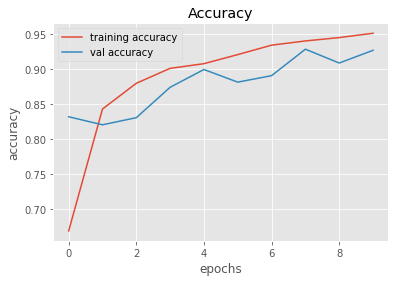

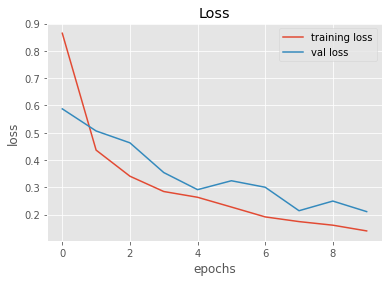

In [22]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [23]:
loss,accuracy=model_LSTM.evaluate(X_test,y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

685/685 [==============================] - 8s 12ms/step - loss: 0.2110 - accuracy: 0.9272
Test loss: 0.21098415553569794
Test accuracy: 0.9272336959838867


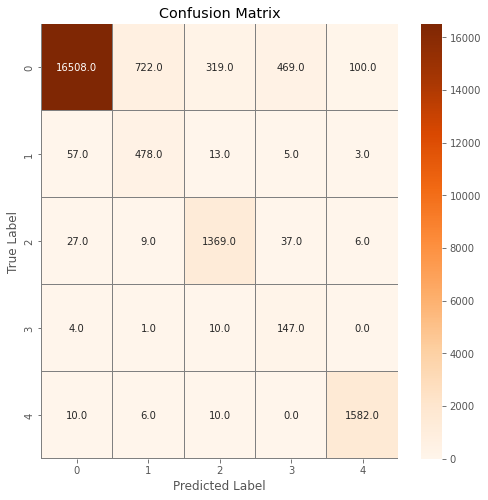

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model_LSTM.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()